In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv("Fertilizer.csv")
df.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,14-35-14
3,22,0,20,28-28
4,35,0,0,Urea


In [4]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


In [5]:
df.isnull().sum()

Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)
df

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,14-35-14
3,22,0,20,28-28
4,35,0,0,Urea
...,...,...,...,...
93,9,10,30,14-35-14
94,24,0,19,28-28
95,4,17,17,10-26-26
97,15,0,41,DAP


In [7]:
missing_value=["N/a","na",np.nan]
df = pd.read_csv("Fertilizer.csv", na_values=missing_value)
df.isnull().sum()


Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [8]:
df.dropna()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,14-35-14
3,22,0,20,28-28
4,35,0,0,Urea
...,...,...,...,...
94,24,0,19,28-28
95,4,17,17,10-26-26
96,39,0,0,Urea
97,15,0,41,DAP


In [9]:
import pandas as pd
Fertilizer = pd.read_csv("Fertilizer.csv")
numerical_column=['Nitrogen']
for column in numerical_column:
    q1=Fertilizer[column].quantile(0.25)
    q3=Fertilizer[column].quantile(0.75)
    iqr=q3-q1
    print(f"{column}:IQR-{iqr}")

Nitrogen:IQR-14.0


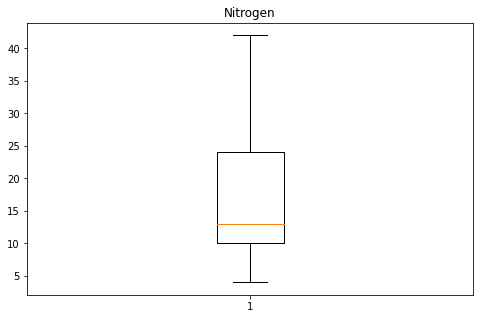

In [10]:
import matplotlib.pyplot as plt
Fertilizer = pd.read_csv("Fertilizer.csv")
for column in numerical_column:
    plt.figure(figsize=(8,5))
    plt.boxplot(Fertilizer[column].dropna())
    plt.title(column)
    plt.show()

In [11]:
import pandas as pd

df = pd.read_csv("Fertilizer.csv", index_col=False)
X = df.drop(['Potassium'], axis=1)
y = df['Potassium']

In [12]:
y.value_counts()

0     71
9      5
10     4
7      3
8      3
13     2
14     2
18     2
19     2
17     2
15     1
12     1
16     1
Name: Potassium, dtype: int64

<AxesSubplot:ylabel='Potassium'>

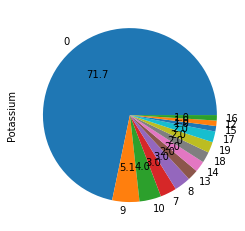

In [13]:
y.value_counts().plot.pie(autopct='%.1f')

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer Name']),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 3), y_train = (79,), x_test = (20, 3), y_test = (20,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [16]:
pred_rand = rand.predict(x_test)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         3
    17-17-17       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         2
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Best score :  0.9876543209876543
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [18]:
import pickle
pickle_out = open('classifier1.pkl', 'wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [19]:
model = pickle.load(open('classifier1.pkl', 'rb'))
ans = model.predict([[4,17,12]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] == 1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17")   
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("UREA")

UREA


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
